In [31]:
from __future__ import print_function
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

In [18]:
df = pd.read_csv('heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.30,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.50,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.60,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.50,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.40,1,0,3,0


In [19]:
df.shape

(297, 14)

In [20]:
df.dropna(axis=0,inplace=True)

In [21]:
df.shape

(297, 14)

In [22]:
y = df['pred_attribute'].as_matrix()
y.shape

/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(297,)

In [23]:
scaler = MinMaxScaler()
#df_scaled = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)

In [24]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,0.71,1.00,0.00,0.48,0.24,1.00,1.00,0.60,0.00,0.37,1.00,0.00,0.75,0.00
1,0.79,1.00,1.00,0.62,0.37,0.00,1.00,0.28,1.00,0.24,0.50,1.00,0.00,0.50
2,0.79,1.00,1.00,0.25,0.24,0.00,1.00,0.44,1.00,0.42,0.50,0.67,1.00,0.25
3,0.17,1.00,0.67,0.34,0.28,0.00,0.00,0.89,0.00,0.56,1.00,0.00,0.00,0.00
4,0.25,0.00,0.33,0.34,0.18,0.00,1.00,0.77,0.00,0.23,0.00,0.00,0.00,0.00


In [25]:
X = df.drop(['pred_attribute'], axis=1).as_matrix()
X.shape

/home/ilya/anaconda3/envs/otus-ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(297, 13)

In [26]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1
d

8

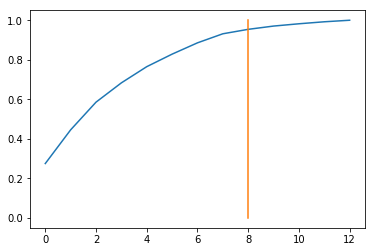

In [27]:
plt.plot(cumsum)
plt.plot([d, d], [0, 1])

In [28]:
pca.explained_variance_ratio_

array([0.27508971, 0.17053755, 0.14003634, 0.09762063, 0.08186751,
       0.06339657, 0.05716147, 0.04580979, 0.02248483, 0.01654367,
       0.01159099, 0.01010159, 0.00775934])

In [52]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_reduced = tsne.fit_transform(X)

In [53]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

AttributeError: 'NoneType' object has no attribute 'sqrt'

In [47]:
tsne = TSNE(n_components=3, random_state=42, perplexity=30)
X_reduced3 = tsne.fit_transform(X)

In [48]:
X_reduced3.shape

(297, 3)

<IPython.core.display.Javascript object>


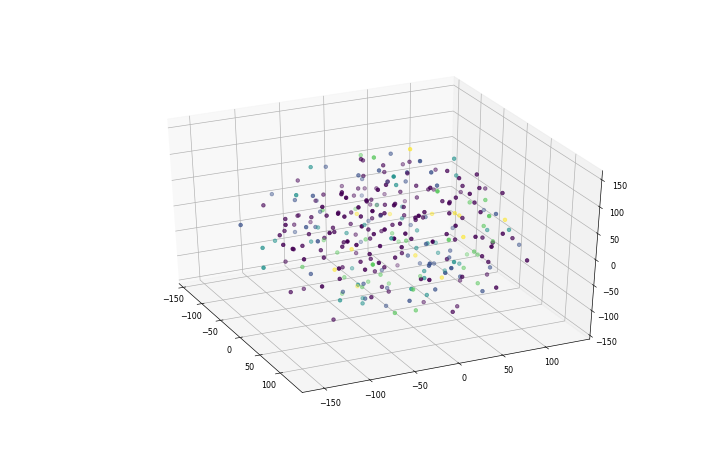

In [49]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2] )
ax.scatter(X_reduced3[:,0], X_reduced3[:,1], X_reduced3[:,2], c=y)

In [54]:
lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X, y))

In [55]:
lda_transformed.shape

(297, 2)

In [56]:
# Plot all three series
plt.scatter(lda_transformed[y==0][0], lda_transformed[y==0][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 3', c='lightgreen')
plt.scatter(lda_transformed[y==3][0], lda_transformed[y==3][1], label='Class 3', c='black')
plt.scatter(lda_transformed[y==4][0], lda_transformed[y==4][1], label='Class 3', c='yellow')
# Display legend and show plot
plt.legend(loc=3)
plt.show()

AttributeError: 'NoneType' object has no attribute 'sqrt'